# 1-  Importing libraries

In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import cifar10 

%matplotlib inline 
tf.__version__

'2.6.0'

# 2- Data preprocessing

### Loading the Cifar10 dataset 

In [3]:
# Loading the dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 71s 0us/step


In [4]:
# Setting class names in the dataset
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

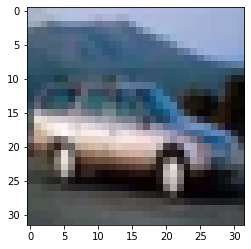

In [9]:
plt.imshow(X_train[4])
plt.show()

### Image normalization

In [10]:
X_train = X_train / 255.0

In [11]:
X_test = X_test / 255.0 

In [16]:
print(X_train.shape , '\n', X_test.shape)

(50000, 32, 32, 3) 
 (10000, 32, 32, 3)


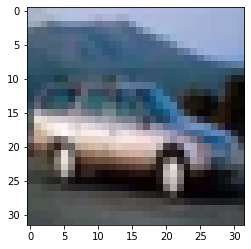

In [12]:
plt.imshow(X_train[4])
plt.show()

# Building a Convolutional Neural Network 

### Defining the model

In [13]:
model = tf.keras.models.Sequential()

### Adding the first convolutional layer

CNN layer hyper-parameters:

- filters: 32

- kernel_size: 3

- padding: same

- activation: relu

- input_shape: (32, 32, 3)

In [18]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same",
                                activation="relu", input_shape=[32,32,3]))

### Adding the second convolutional layer and the max-pooling layer

CNN layer hyper-parameters:

- filters: 32

- kernel_size:3

- padding: same

- activation: relu

MaxPool layer hyper-parameters:

- pool_size: 2

- strides: 2

- padding: valid

In [19]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                                padding="same",activation="relu"))

In [20]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="valid"))

### Adding the third convolutional layer

CNN layer hyper-parameters: 
```
filters: 64
kernel_size:3
padding: same
activation: relu
```

In [21]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

### Adding the fourth convolutional layer and max-pooling layer

CNN layer hyper-parameters: 
```
filters: 64
kernel_size:3
padding: same
activation: relu
```

In [22]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

MaxPool layer hyper-parameters: 
```
pool_size: 2
strides: 2
padding: valid
```

In [23]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="valid"))

### Adding the flattening layer

In [24]:
model.add(tf.keras.layers.Flatten())

### Adding the first fully-connected layer

Dense layer hyper-parameters:

    units/neurons: 128
    activation: relu

In [25]:
model.add(tf.keras.layers.Dense(units=128, activation="relu"))

### Adding the output layer

Dense layer hyper-parameters:

    units/neurons: 10 (number of classes)
    activation: softmax

In [26]:
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

### Summary of model

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Compiling the model

sparse_categorical_accuracy

sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value. 

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [28]:
model.compile(optimizer= "Adam", loss="sparse_categorical_crossentropy", 
             metrics="sparse_categorical_accuracy")

In [29]:
model.fit(X_train, y_train, epochs=5)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


Epoch 1/5
1563/1563 [==============================] - 157s 100ms/step - loss: 1.4019 - sparse_categorical_accuracy: 0.4930
Epoch 2/5
1563/1563 [==============================] - 159s 102ms/step - loss: 0.9294 - sparse_categorical_accuracy: 0.6723
Epoch 3/5
1563/1563 [==============================] - 182s 117ms/step - loss: 0.7483 - sparse_categorical_accuracy: 0.7378
Epoch 4/5
1563/1563 [==============================] - 120s 77ms/step - loss: 0.6201 - sparse_categorical_accuracy: 0.7819
Epoch 5/5
1563/1563 [==============================] - 119s 76ms/step - loss: 0.5158 - sparse_categorical_accuracy: 0.8185


### Evaluating the model

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.7970 - sparse_categorical_accuracy: 0.7399


In [31]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7398999929428101
